In [2]:
import json
import csv
import sys

db = 49220

def szures(s):
	s = s.lower()
	s = s.replace("\u00e0", "a")
	s = s.replace("\u0103", "a")
	s = s.replace("\u00e1", "a")
	s = s.replace("\u00e2", "a")
	s = s.replace("\u0391", "a")
	s = s.replace("\u03b1", "a")
	
	s = s.replace("\u00e9", "e")
	s = s.replace("\u00e8", "e")
	
	s = s.replace("\u00ed", "i")
	s = s.replace("\u00ec", "i")
	s = s.replace("\u00ee", "i")
	
	s = s.replace("\u00f3", "o")
	s = s.replace("\u00f6", "o")
	s = s.replace("\u0151", "o")
	s = s.replace("\u039f", "o")
	
	s = s.replace("\u039b", "l")
	
	s = s.replace("\u00fa", "u")
	s = s.replace("\u0171", "u")
	s = s.replace("\u00fc", "u")
	s = s.replace("\u016b", "u")
	
	s = s.replace("\u015f", "s")
	s = s.replace("\u0219", "s")
	
	s = s.replace("\u021b", "t")
	s = s.replace("\u0163", "t")
	
	s = s.replace("\u0e4f", "")
	s = s.replace("\u032f", "")
	s = s.replace("\u0361", "")
	
	s = s.encode('ascii', 'ignore').decode('utf8')
	
	return s

with open("proba.txt") as f:
	s = f.read()
s = szures(s)
data = json.loads(s)
pure_data = json.loads(s)

db = 0
for d in data:
    if "workwhat" in d:
        db = db + 1
print(db)

9572


In [3]:
def count_occurence_of(col):

    dict = {}
    for i in data:
        if col in i:
            b = i[col]
            if b in dict:
                dict[b] = dict[b] + 1
            else:
                dict[b] = 1
    return dict

birth_cities_count = count_occurence_of("birth")
print(birth_cities_count)

{'keresztur': 2830, 'csikszereda': 3508, 'udvarhely': 3310, 'barot': 2335, 'szentgyorgy': 3494, 'kezdi': 3384, 'kovaszna': 3915, 'szovata': 1522, 'vasarhely': 3823, 'gyergyo': 3461, 'vlahica': 2329, 'segesvar': 2539, 'kolozsvar': 3942, 'balan': 2312, 'regen': 2770, 'toplita': 2564, 'parajd': 1182}


In [4]:
birth_cities = list(birth_cities_count.keys())

stud_dict = dict.fromkeys(birth_cities,0)
for i in data:
    if "studwhere" in i:
        if i["studwhere"] != "None":
            city = i["birth"]
            stud_dict[city] = stud_dict[city] + 1

work_dict = dict.fromkeys(birth_cities,0)            
for i in data:
    if "workwhere" in i or "workwhat" in i:
        city = i["birth"]
        work_dict[city] = work_dict[city] + 1

print(stud_dict)
print(work_dict)

{'keresztur': 1313, 'csikszereda': 1605, 'udvarhely': 1518, 'barot': 1124, 'szentgyorgy': 1623, 'kezdi': 1609, 'kovaszna': 1880, 'szovata': 664, 'vasarhely': 1720, 'gyergyo': 1477, 'vlahica': 964, 'segesvar': 1124, 'kolozsvar': 1767, 'balan': 956, 'regen': 1180, 'toplita': 1192, 'parajd': 459}
{'keresztur': 1585, 'csikszereda': 1777, 'udvarhely': 1673, 'barot': 1258, 'szentgyorgy': 1900, 'kezdi': 1741, 'kovaszna': 2081, 'szovata': 741, 'vasarhely': 2065, 'gyergyo': 1700, 'vlahica': 1132, 'segesvar': 1335, 'kolozsvar': 2235, 'balan': 1107, 'regen': 1436, 'toplita': 1341, 'parajd': 611}


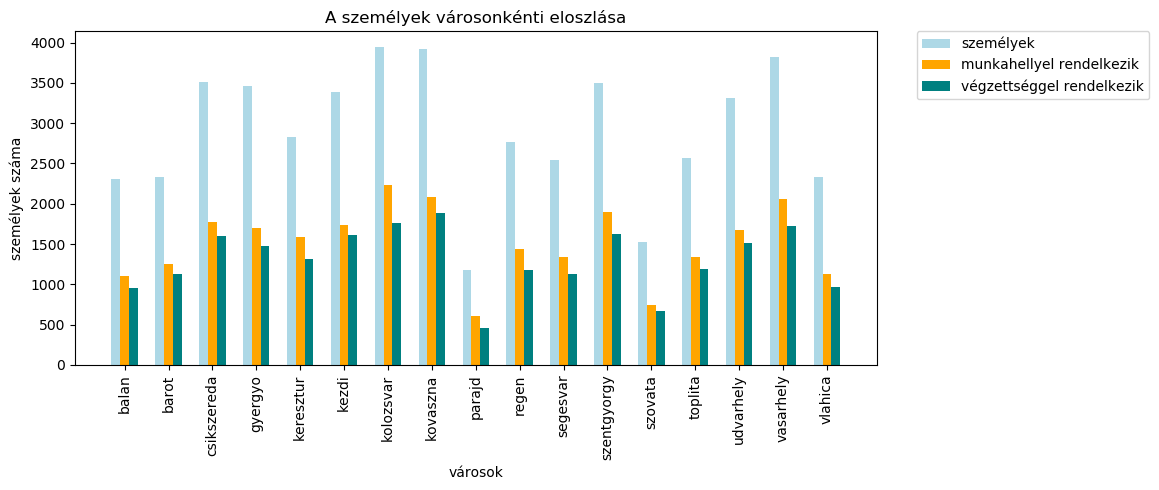

('balan', 'barot', 'csikszereda', 'gyergyo', 'keresztur', 'kezdi', 'kolozsvar', 'kovaszna', 'parajd', 'regen', 'segesvar', 'szentgyorgy', 'szovata', 'toplita', 'udvarhely', 'vasarhely', 'vlahica')


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5), dpi=100)

birth_list = sorted(birth_cities_count.items())
stud_list = sorted(stud_dict.items())
work_list = sorted(work_dict.items())
x1, y1 = zip(*birth_list)
x2, y2 = zip(*work_list)
x3, y3 = zip(*stud_list)

bar_width = 0.2
index = np.arange(17)

bar1 = plt.bar(index, y1, bar_width, color='lightblue', label='személyek')
bar2 = plt.bar(index + 0.2, y2, bar_width, color='orange', label='munkahellyel rendelkezik')
bar3 = plt.bar(index + 0.4, y3, bar_width, color='teal', label='végzettséggel rendelkezik')


plt.xticks([i + 0.2 for i in range(17)],sorted(birth_cities), rotation=90)
plt.xlabel("városok")
plt.ylabel("személyek száma")
plt.title("A személyek városonkénti eloszlása")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
print(x1)

In [6]:
schools = count_occurence_of("studwhere")
#for key, el in schools.items():
 #   print(key, el)
    
workwhat = count_occurence_of("workwhat")
#for w in sorted(workwhat, key=workwhat.get, reverse=True):
 #   print(w, workwhat[w])
    
workwhere = count_occurence_of("workwhere")
#for w in sorted(workwhere, key=workwhere.get, reverse=True):
 #   print(w, workwhere[w])

In [7]:
def lev(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [9]:
def workdict(s):
    s = s.lower()
    s = szures(s)
    if "fodrasz" in s \
        or 'coafeza' in s \
        or "manikur" in s \
        or "make up" in s \
        or "makeup" in s \
        or "manicur" in s \
        or "mukormos" in s \
        or "airdresser" in s \
        or "hair-cutter" in s \
        or "ozmetikus" in s \
        or "sminkes" in s \
        or "stylist" in s \
        or "hairstylist" in s \
        or "hairsylist" in s \
        or "manichiur" in s \
        or "edikur" in s \
        or 'hair stylist' in s \
        or "nail technician" in s \
        or "/hairstilyst" in s \
        or "szolarium" in s \
        or "cosmetician" in s \
        or "kormos" in s \
        or "tester" in s \
        or "korom" in s: return u"Fodrász/Kozmetikus"
    elif "eveloper" in s \
        or "evelopment" in s \
        or "webdesign" in s \
        or " web " in s \
        or "web developer" in s \
        or "developer" in s \
        or "it service" in s \
        or "global masterdata" in s \
        or "programmer" in s \
        or "software engineer" in s \
        or " it " in s \
        or "software" in s \
        or "informatikus" in s \
        or "instalator" in s \
        or "rendszergazda" in s \
        or "programator" in s \
        or "automation" in s : return u"Informatikus"
    elif "engineer" in s \
        or "mernok" in s \
        or "epitesz" in s \
        or "rchitect" in s \
        or "inginer" in s \
        or "arhitect" in s \
        or "autocad" in s \
        or "ing silvic" in s \
        or "sc.electrica" in s \
        or "land surveyor" in s \
        or "architect" in s \
        or "inginear" in s \
        or "eigenaar" in s \
        or "restaurator" in s \
        or "cartographer" in s : return u"Mérnök/Műépítész"
    elif "ugyved" in s\
        or "avocat" in s \
        or "attorney" in s \
        or "notar" in s \
        or "jurist" in s \
        or "jegyzo" in s \
        or "pengacara" in s \
        or "juristconsult" in s \
        or "lawyer" in s : return u"Ügyvéd/Közjegyző"
    elif "veterinarian" in s \
        or "dentist" in s \
        or "orvos" in s \
        or "doctor" in s \
        or "medic" in s \
        or "rtoped" in s \
        or "orthodontist" in s \
        or "fogtechnikus" in s \
        or "gyogyszeresz" in s \
        or "pharma" in s \
        or "dietitian" in s \
        or "neurochirurgie" in s \
        or "pharmacist" in s \
        or "rezidens" in s \
        or "rezident" in s \
        or "farmacist" in s \
        or "dr." in s \
        or "health" in s \
        or "paramedic" in s \
        or "fogorvos" in s \
        or "optometrista" in s \
        or "chirurg cardiovascular" in s \
        or "nogyogyaszat" in s \
        or "neurologie" in s \
        or "neurology" in s \
        or "medic" in s: return u"Orvos/Gyógyszerész"
    elif "agent" in s \
        or "komissios" in s \
        or "commissioner" in s \
        or "tanacsado" in s \
        or "biztositasi" in s \
        or "consultant" in s \
        or "sales" in s \
        or "kassza" in s \
        or "receptionist" in s \
        or "recepcionist" in s \
        or "hotel" in s \
        or "elado" in s \
        or "non stop" in s \
        or "sales reprezentative" in s \
        or "consultant vanzari" in s \
        or "reprezentant vanzari" in s \
        or "bezirks" in s \
        or "ugynok" in s \
        or "komisszios" in s \
        or "front officer" in s \
        or "ozvetit" in s \
        or "forgalamzo" in s \
        or "broker" in s \
        or "uzletvezeto" in s \
        or "elarusito" in s \
        or "ügyfelszolgalat" in s \
        or "technical support" in s \
        or "care assistant" in s \
        or "vanzato" in s \
        or "vanzatoare" in s \
        or "cashier" in s \
        or "elado" in s \
        or "marketing" in s \
        or "dc support executive" in s \
        or 'reception specialist' in s \
        or 'travel agent' in s \
        or 'oriflame' in s \
        or "avon" in s \
        or 'earusito' in s \
        or 'recepcios' in s\
        or 'administrator' in s \
        or "gestionar" in s \
        or "host/hostess" in s \
        or "hostess" in s \
        or "uzlet" in s \
        or "benzinkutas" in s \
        or "arufeltolto" in s \
        or "bufes" in s \
        or "tarsak boltja" in s \
        or "salon" in s \
        or "auto export" in s \
        or "mengment" in s \
        or "asm" in s \
        or "operator" in s \
        or "comercial" in s \
        or "vanzari" in s \
        or "elarus" in s: return u"Eladó/Ügynök/Recepciós"
    elif "owner" in s \
        or "tulajdonos" in s \
        or "tulaj" in s \
        or "director" in s \
        or "manager" in s \
        or "menedzser" in s \
        or "mngr" in s \
        or "management" in s \
        or "managing director" in s \
        or "lnok" in s \
        or "elnok." in s \
        or "ketua" in s \
        or "fonok" in s \
        or "gazgat" in s \
        or "leader" in s \
        or "guide" in s \
        or "ugyvezeto" in s \
        or "gyvezető" in s \
        or "tulajdonos" in s \
        or "kirendeltsegvezeto" in s \
        or "managing partner" in s \
        or "chief" in s \
        or "boss" in s \
        or "fnok" in s \
        or "elonk" in s \
        or "cegvezeto" in s \
        or "president" in s \
        or "fovezeto" in s \
        or "resedint" in s \
        or "fonok" in s \
        or "proprietar" in s \
        or 'director and ceo' in s \
        or "ceo" in s \
        or "c.e.o." in s \
        or "igazgato" in s \
        or "sef" in s \
        or "valalkozo" in s \
        or 'redactor sef' in s \
        or "maganvallalkozso" in s \
        or "pengusaha" in s \
        or "reszlegfelelos" in s \
        or "vallalkozo" in s \
        or "fonnok" in s \
        or "rector" in s \
        or "csapatvezeto" in s \
        or "founder" in s: return u"Igazgató/Vállalkozó"
    elif "montessori educator" in s \
        or "szociologus" in s \
        or "graduate student researcher" in s \
        or "teaching assistant" in s \
        or "tanar" in s \
        or "edagog" in s \
        or "lab assistant" in s \
        or "doktorandusz" in s \
        or "educatoare" in s \
        or "teacher" in s \
        or "tanito" in s \
        or "tanitono" in s \
        or "profesor" in s \
        or "professor" in s\
        or "szakerto" in s \
        or "archaeol" in s \
        or "rofessor" in s \
        or "rektor" in s \
        or "phd" in s \
        or "adjunktus" in s \
        or "niversity" in s \
        or "laborans" in s \
        or "science" in s \
        or "psycholog" in s \
        or "pszicho" in s \
        or "psziho" in s \
        or "biologist" in s \
        or "oktatasi vezeto" in s \
        or "szakfelugyelo" in s \
        or "analist" in s \
        or 'teaching assistant' in s \
        or "lecturer" in s \
        or "research" in s \
        or "oktato" in s \
        or "suliban" in s \
        or "oktatasi" in s \
        or "physician" in s \
        or "geoscientist" in s \
        or "iskola" in s \
        or "corepetitor" in s \
        or "psiholog" in s \
        or "biolog" in s \
        or "chemist" in s \
        or "invatatoare" in s \
        or "statistician" in s \
        or "lector" in s \
        or "sensei" in s \
        or "teaching" in s \
        or "regesz" in s \
        or "laboranta" is s \
        or "laborant" in s \
        or "kutato" in s \
        or "rofessor" in s \
        or "tortenelem tanar" in s: return u"Tanár/Kutató"
    elif "author" in s \
        or "dj" in s \
        or "actor" in s \
        or "drummer" in s \
        or "singer" in s \
        or "bogos" in s \
        or "pianist/accmapnist" in s \
        or "tancos" in s \
        or "dansator" in s \
        or "primas" in s \
        or "artist" in s \
        or "zenesz" in s \
        or "zinesz" in s \
        or "szinesz" in s \
        or "bass" in s \
        or "solista" in s \
        or "piercer" in s \
        or "tarlatvezeto" in s \
        or "enekes" in s \
        or "guitar" in s \
        or "gitar" in s \
        or "muvesz" in s \
        or "kantor" in s \
        or "actress" in s \
        or "axophon" in s \
        or "new fasion" in s \
        or " dj " in s \
        or "instrumentist" in s \
        or "tenoros" in s \
        or "vocal" in s \
        or 'cellist' in s \
        or "saxofonos" in s \
        or "organist" in s \
        or "cantaret" in s \
        or "basist" in s \
        or "bogos" in s \
        or "musician" in s\
        or 'zongorista' in s \
        or 'zongorista, zenekar vezeto, alapito tag' in s \
        or 'enekesno' in s \
        or "djing" in s \
        or "blogger" in s \
        or "owner/photographer" in s \
        or "solist" in s \
        or "violinist" in s \
        or "szaxofonos" in s \
        or "trombitas" in s \
        or "tubas" in s \
        or "orchestrator,compozitor" in s \
        or "clarinetist" in s \
        or "vocalist" in s \
        or "tattooing" in s \
        or "estetista" in s \
        or "drawer" in s \
        or "eloado" in s \
        or "dancer" in s: return u"Zenész/Művész"
    elif "trainer" in s \
        or "gyogypedagogus" in s \
        or "gyogytornasz" in s \
        or "kinetoterapeuta" in s \
        or "coach" in s \
        or "instructor" in s \
        or "itness" in s \
        or "focicsapat" in s \
        or "edzo" in s \
        or "antrenor" in s \
        or "mijlocas" in s \
        or "sport" in s \
        or "mtb rider" in s \
        or "jatekos" in s \
        or "thlete" in s \
        or "kapus" in s \
        or "portar" in s \
        or "oalkeeper" in s \
        or "hatved" in s \
        or "vedo" in s \
        or "striker" in s \
        or "forward" in s \
        or "versenyzo" in s \
        or "versenyfelugyelo" in s \
        or "defense" in s \
        or "rbitru" in s \
        or "point guard" in s \
        or "beallo" in s \
        or "estnevel" in s \
        or "fotbalist" in s \
        or "masseur" in s \
        or "csatar" in s \
        or "ozeppalyas" in s \
        or "kosarlabda" in s \
        or 'karate' in s \
        or "zumba" in s \
        or "salsa" in s \
        or "majoreta" in s \
        or "basketball" in s \
        or "atleta" in s \
        or "box club" in s \
        or "kozepalyas" in s \
        or "fotbal" in s \
        or "jucator" in s \
        or "yoga" in s \
        or "boxolo" in s \
        or "kapitany" in s \
        or "massage" in s \
        or "hochei" in s \
        or "player" in s: return u"Sportoló/Edző/Bíró"
    elif "analyst" in s \
        or "online communication" in s \
        or "communication assistant" in s \
        or "marketing assistant" in s \
        or "relations assistant" in s \
        or "marketing officer" in s \
        or "marketing specialist" in s \
        or "online marketing" in s \
        or "pr & marketing" in s \
        or "public relations" in s \
        or "pr officer" in s \
        or "asistent pr" in s \
        or "creatice executive" in s \
        or "dministrator" in s \
        or "dminisztrátor" in s \
        or "dminisztr" in s \
        or "adm." in s \
        or "chief accountant" in s \
        or "oficer credite" in s \
        or "forwarder" in s \
        or "sef serviciu" in s \
        or "managing partner - mena" in s \
        or "csr" in s \
        or "oordinator" in s \
        or "oordonator" in s \
        or "konyvelo" in s \
        or "project officer" in s \
        or "comptroller" in s \
        or "titkar" in s \
        or "titkarno" in s \
        or "internet marketer" in s \
        or "secretar" in s \
        or "supplier relations advisor" in s \
        or "secretar" in s \
        or "contabil" in s \
        or "ccountant" in s \
        or "planner" in s \
        or "controlling" in s \
        or "accounts payable" in s \
        or "irodavezeto" in s \
        or "qmc" in s \
        or "osztalyvezeto" in s \
        or "quality control" in s \
        or "account representative" in s \
        or 'primary accounting' in s \
        or 'accounting' in s \
        or "order managment" in s \
        or "tanacsado" in s \
        or "fomunkatars" in s \
        or "economist" in s \
        or "accountant" in s \
        or "accountancy" in s \
        or "euditor" in s \
        or "inspector" in s \
        or "secretary" in s \
        or "intezmenyvezeto helyettes" in s \
        or "plenum member, competition concillor" in s \
        or "penztar" in s \
        or "counselor" in s \
        or "bankar" in s \
        or "office" in s \
        or "designer" in s \
        or "bussiness" in s \
        or "human resources" in s \
        or "facturist" in s \
        or "facturista" in s \
        or "resurse umane" in s \
        or "key account operator" in s: return u"Irodai_alkalmazott"
    elif "cook (servant)" in s \
        or "bartender" in s \
        or "cukrasz" in s \
        or "kemencas" in s \
        or "waitress" in s \
        or "le chef" in s \
        or "chelner" in s \
        or "pizza" in s \
        or "baros" in s \
        or "bufés" in s \
        or "waiter" in s \
        or "barman" in s \
        or "barnan" in s \
        or "table host" in s \
        or "kiszolgalo" in s \
        or "pultos" in s \
        or "pincer" in s \
        or "elszolgal" in s \
        or "ospatar" in s \
        or "cafengiu" in s \
        or "chef" in s \
        or "zakacs" in s \
        or "zeletelő" in s \
        or "emences" in s \
        or "barista" in s \
        or "vendeglatas" in s \
        or "food and beverage" in s \
        or 'capra neagra pioana brasov' in s \
        or 'bucatar' in s \
        or "pincerno" in s \
        or "macare" in s \
        or "mancare" in s \
        or "kostolo" in s \
        or "pincrno" in s \
        or "cuptorist" in s \
        or "étterem" in s \
        or "pincer" in s: return u"Bartender/Pincér/Szakács"
    elif "reporter" in s \
        or "stage management" in s \
        or "rendezvenyszervezo asszisztens" in s \
        or "photo" in s \
        or "photographer" in s \
        or "foto" in s \
        or "fenykep" in s \
        or "fotolaborator" in s \
        or "press" in s \
        or "music director" in s \
        or "2d animator" in s \
        or "sound & light" in s \
        or "editor" in s \
        or "model" in s \
        or "referen" in s \
        or "szerkeszt" in s \
        or "producer" in s \
        or "ournalist" in s \
        or "kreativ" in s \
        or "correspondent" in s \
        or "reklam" in s \
        or "rafikus" in s \
        or "musor" in s \
        or "hang es feny" in s \
        or "hangteknikus" in s \
        or "nyomdasz" in s \
        or "tipograf" in s \
        or "usorvezeto" in s \
        or "vago" in s \
        or "animator" in s \
        or "ujsag" in s \
        or "graphic design" in s \
        or "graphic designer" in s \
        or "tortenelem tematikaju musor" in s \
        or "jurnalist" in s \
        or "szorakoztatas" in s \
        or "cikkiro" in s \
        or "television" in s \
        or "presenter" in s: return u"Médiamunkás"
    elif " elev" in s \
        or "diak" in s \
        or "college" in s \
        or "studying" in s \
        or "tanulo:d" in s \
        or 'meg suliba jarok' in s \
        or 'tanulo' in s \
        or "scolarita" in s \
        or "hallgato" in s \
        or "egyetemista" in s \
        or "suli" in s \
        or "koptatom" in s \
        or "iskolas" in s \
        or "student" in s: return u"Tanuló"
    elif "nevelo" in s \
        or "au pair" in s \
        or 'ovono' in s \
        or "ovoneni" in s \
        or "nevelo" in s \
        or "asszisztens" in s \
        or "sszisztens" in s \
        or "asziszt" in s \
        or "assistente" in s \
        or "aszisztens" in s \
        or "assistant" in s \
        or "asistent" in s \
        or "asistente" in s \
        or "szocialis munkas" in s \
        or "szocialpedagogus" in s \
        or "ovodapedagogus" is s \
        or "volunteering" in s \
        or "volunteer" in s \
        or "nkentes" in s \
        or "onkentes" in s \
        or "apolo" in s \
        or "szuleszno" in s \
        or "betegapolo" in s \
        or "betegek" in s \
        or "asistenta medicala" in s \
        or "asistent medical" in s \
        or "asisteentin" in s \
        or "aszizstens" in s \
        or "voluntar" in s \
        or "educato" in s \
        or "dadus" in s \
        or "ingrijitor" in s \
        or "szobalany" in s \
        or "camarela" in s \
        or "krankenschw" in s \
        or "staff" in s \
        or 'social work' in s \
        or "nurs" in s: return u"Nevelő/Au Pair/Önkéntes"
    elif "polgarmester" in s \
        or "alkalmazott" in s \
        or "ormester" in s \
        or "tanacsos" in s \
        or "police" in s \
        or "politic" in s \
        or "politist" in s \
        or "tisztvisel" in s \
        or "ambassador" in s \
        or "onkormany" in s \
        or "youth policy" in s \
        or "katonatiszt" in s \
        or "marshall" in s \
        or "ifjusagpolitika" in s \
        or "kepviselojelolt" in s \
        or "senator" in s \
        or "mayor" in s \
        or "functionar public" in s \
        or "kormanyzo" in s \
        or "lieutenant" in s \
        or "katona" in s \
        or "kepviselo" in s \
        or "politie" in s \
        or "tanacsos" in s \
        or "politikus" in s: return u"Közalkalmazott"
    elif "iranyito" in s \
        or "aktáros" in s \
        or "iszpecser" in s \
        or "logistics specialist" in s \
        or "logisztikai reszlegvezeto" in s \
        or "coordonator de transport" in s \
        or "ogistik" in s \
        or "loctitian" in s \
        or "raktar" in s \
        or "ogistic" in s \
        or "ogisztik" in s \
        or "receiving operator" in s: return u"Raktáros/Logisztikus"
    elif "driver" in s \
        or "vezeto" in s \
        or "distributor" in s \
        or "zallito" in s \
        or "szallito" in s \
        or "kamion" in s \
        or "posta" in s \
        or "kiszalito" in s \
        or "uszvezet" in s \
        or "gepkocsi" in s \
        or "sofr" in s \
        or "sofor" in s \
        or "argonc" in s \
        or "driver" in s \
        or "sofer" in s \
        or "instructor auto" in s \
        or "fuvarozo" in s \
        or "taxi" in s \
        or "curier." in s: return u"Sofőr"
    elif "lactatos" in s \
        or "szerelo" in s \
        or "soportvezeto" in s \
        or "dekorator" in s \
        or "decorator" in s \
        or "egeszto" in s \
        or "munkas" in s \
        or "operator statie" in s \
        or "mailmaster" in s \
        or "mashine oper" in s \
        or "hentes" in s \
        or "construction" in s \
        or "inspector itp" in s \
        or "auto mechanic" in s \
        or "electrician" in s \
        or "ipari alpinista" in s \
        or "epkezel" in s \
        or "kazan futu" in s \
        or "gepbeall" in s \
        or "segedmunkas" in s \
        or "seged munkas" in s \
        or "asztalos" in s \
        or "kovacs" in s \
        or "varr" in s \
        or "varono" in s \
        or "munkas" in s \
        or "husipar" in s \
        or "csomagolas" in s \
        or 'ambalaj' in s \
        or "kabelteve tehnikus" in s \
        or "omuves" in s \
        or "konyvtaros" in s \
        or "librarian" in s \
        or "azankezel" in s \
        or "omuves" in s \
        or "konyvkoto" in s \
        or "muncitoare" in s \
        or "tehnician" in s \
        or "muncitor" in s \
        or "pek" in s \
        or "cuptorar" in s \
        or "cook" in s \
        or "lakkozo" in s \
        or 'brutar' in s \
        or 'szakmunkas' in s \
        or "lucrator" in s \
        or "aruatvevo" in s \
        or "fenyezo" in s \
        or "viragkoto" in s \
        or "sotoro" in s \
        or "automoso" in s \
        or "meszaros" in s \
        or "asfaltator" in s \
        or "electrician" in s \
        or "vulkanizalo" in s \
        or "szabaszat" in s \
        or "heggeszto" in s \
        or "tehnicean sunet" in s \
        or "epitkezes" in s \
        or "aszfalt" in s \
        or "tehnolog" in s \
        or "tehnikus" in s \
        or "mechanic" in s \
        or "ambalator" in s \
        or "takarito" in s \
        or "constructor" in s \
        or "pintor" in s \
        or "banyasz" in s \
        or "patron" in s \
        or 'biblioteca "gyulai liviusz"' in s \
        or 'tehnician electronist' in s \
        or 'production' in s \
        or "gepesz" in s \
        or 'assembly line' in s \
        or 'zidar, pietrat, tencuitor' in s \
        or "technician" in s \
        or "lakatos" in s \
        or "csomaolo" in s \
        or "bejarono" in s \
        or "mecanic" in s \
        or "florareasa" in s \
        or "vilanyos" in s \
        or "villanyos" in s \
        or "vakolo" in s \
        or "fafarago" in s \
        or "laminator" in s \
        or "csomagolo" in s \
        or "acs" in s \
        or "shaper" in s: return u"Szakmunkás"
    elif "anya" in s \
        or "mummy" in s \
        or "mama" in s \
        or "mommy" in s \
        or "anyuka" in s \
        or "mother" in s \
        or "mamica" in s \
        or "anyuci" in s \
        or "mamma" in s \
        or "casnic" in s \
        or "housekeeping" in s \
        or "mum" in s: return u"Édesanya/Háztartásbeli"
    elif "someone who stares" in s \
        or "hmm" in s \
        or "szentgyorgy" in s \
        or "..." in s \
        or "elni tanitok" in s \
        or "cczr" in s \
        or "gorgény" in s \
        or "meg nincs" in s \
        or "destin" in s \
        or 'kjhgfd' in s \
        or "eletmuvesz" in s \
        or "league of legends'" in s \
        or "semmi" in s \
        or "tengo" in s \
        or "kepzelges" in s \
        or "perfect" in s \
        or "nyalóka móka" in s \
        or "pirate" in s \
        or "munkanelkuli" in s \
        or "nincsmeg" in s \
        or "8 ora" in s \
        or "nincs meg" in s \
        or "øadinğ ..… ▂ ▃ ▄ ▅ ▆ ▇ █ ✖ i♥ g@ss£rine ✖ i♥ ѕuммεʀ • ✖i♥ pɑʀту >> ✖i♥ ɢɪʀℓѕ ✖i♥ aℓℓ му fʀɪeиďs ✖x' sortir ✖x' dormir ✖x' rire ✖x' manger → 'love' ← →♫ ℳʋʂɨգʊҿ ♫" in s \
        or "szasznika" in s \
        or "sokminden" in s \
        or "hetfo" in s : return "None"
    elif "mindenes" in s \
        or "yakornok" in s \
        or "padurar" in s \
        or "vadasz" in s \
        or "trainee" in s \
        or "intern" in s \
        or "draien" in s \
        or "crew" in s \
        or "extrema" in s \
        or "lifeguard" in s \
        or "pilot" in s \
        or "member" in s \
        or "asociat" in s \
        or "noi kvota" in s \
        or "mehesz" in s \
        or "steinbruch" in s \
        or "supervisor" in s \
        or "hegyimento" in s \
        or "intern" in s \
        or "beosztom magam :-)" in s \
        or "putzfrau" in s \
        or "securitate" in s \
        or "kulfold" in s \
        or "pastor" in s \
        or "mploye" in s \
        or "lelkipasztor" in s \
        or "lelkesz" in s \
        or "ez meg az" in s \
        or "admin" in s \
        or "trichinella" in s \
        or "allat kezel" in s \
        or "gondnok." in s \
        or "pasztor" in s \
        or "biztonsagi" in s \
        or "bisztonsagi" in s \
        or "hitman" in s \
        or "missionary" in s \
        or "internship" in s \
        or "my own boss" in s \
        or "freelancer" in s \
        or "itchhiker" in s \
        or "associate" in s \
        or "self-employed" in s \
        or "captain" in s \
        or "juniyear" in s \
        or 'alapito' in s \
        or "frec mangal" in s \
        or "melos" in s \
        or "deputat" in s \
        or 'foaming' in s \
        or "mas" in s \
        or 'vadasz' in s \
        or "stivuitorist" in s \
        or "nyomozo" in s \
        or "bekefentarto" in s \
        or "elokeszito" in s \
        or "kolozsvartarsasag.com/pagina.php" in s: return u"Más"
    else: return u"Más"
    
foglalkozasok = ["Fodrász/Kozmetikus", "Mérnök/Műépítész", "Ügyvéd/Közjegyző", "Tanár/Kutató", "Tanuló","Informatikus", "Sportoló/Edző/Bíró", "Orvos/Gyógyszerész", "Irodai_alkalmazott", "Eladó/Ügynök/Recepciós", "Bartender/Pincér/Szakács", "Médiamunkás", "Zenész/Művész", "Igazgató/Vállalkozó", "Nevelő/Au Pair/Önkéntes", "Szakmunkás", "Raktáros/Logisztikus", "Sofőr", "Közalkalmazott", "Édesanya/Háztartásbeli", "None", "Más"]
munkahelyek_szama = dict.fromkeys(foglalkozasok,0)
munkahelyek_csoportja = dict.fromkeys(foglalkozasok)
for key, _ in munkahelyek_csoportja.items():
    munkahelyek_csoportja[key] = []

    
for key, el in workwhat.items():
    m = workdict(key)
    munkahelyek_szama[m] = munkahelyek_szama[m] + el
    munkahelyek_csoportja[m].append(key)
    
for key, el in munkahelyek_szama.items():
    print(el)
    
print(munkahelyek_csoportja["Más"]) 

#s = {}

#for w in sorted(munkahelyek_szama, key=munkahelyek_szama.get, reverse=True):
 #   print(w, munkahelyek_szama[w])
    #s[w] = munkahelyek_szama[w]

174
313
40
659
114
289
325
473
454
929
347
306
425
1433
443
354
36
245
85
39
52
2037
['former legal practitioner', 'arbeiter', 'former boat cleaner', 'melós', 'deputat', 'referee', 'midfielder', 'greenhouse worker', 'former beszerzo', 'concierge', 'foaming', 'alapító', 'former ofiter call center', 'itt', 'vadász', 'former lider', 'cond auto international', 'member', 'former föállásu nyugdijas', 'writer', 'consilier', 'ofiter cont', 'g.s.a', 'former entrepreneurship', 'vp', 'szerelde bmw sor', 'az', 'customer service representative', 'servitris', 'former trainee', 'pr', 'bookbinder', 'project support specialist', 'd', 'former konyhas', 'fundraiser', 'partner', 'empleador de hogar', 'schimbator scrumiere', 'maseuza', 'kertész', 'former projektleiter', 'former as.med. lab.', 'general ledger clerk', 'joiner', 'ambulantier', 'vigyazat', 'stivuitorist', 'van', 'qualitätsprüferin', 'former kos karoly', 'professional hitman', 'nyomozÓ', 'mid laner', 'auditor', 'mail carrier', 'aprovizionare be

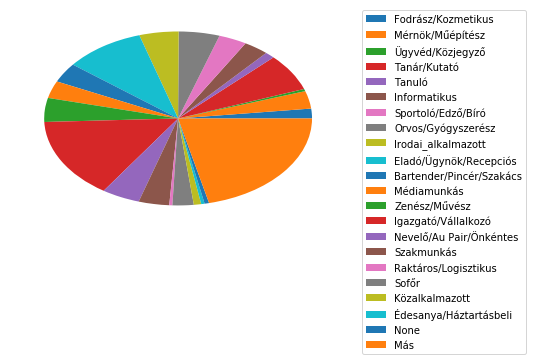

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
#cs = ["brown", "sandybrown", "maroon", "darkmagenta", "deepskyblue"]
plt.pie(munkahelyek_szama.values())#, labels = munkahelyek_szama.keys())#[" ", "Mérnök/Műépítész", " ", "Tanár/Kutató", " ", " ", "Sportoló/Edző/Bíró", "Orvos/Gyógyszerész", " ", "Eladó/Ügynök/Recepciós", " ", " ", "Zenész/Művész", "Igazgató/Vállalkozó", " ", "Szakmunkás", " ", " ", " ", " ", "Más"])
plt.legend(munkahelyek_szama.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
def studdict(s):
    s = s.lower()
    s = szures(s)
    if "miko" in s: return u"Székely Mikó Kollégium, Sepsiszentgyörgy"
    elif "mikes" in s: return u"Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy"
    elif "nagy mozes" in s: return  u"Nagy Mózes Elméleti Líceum, Kézdivásárhely"
    elif "orban balazs" in s: return u"Orbán Balázs Gimnázium, Székelykeresztúr"
    elif "gabor aron" in s: return u"Gábor Áron Szakképző Líceum, Kézdivásárhely"
    elif "marton" in s \
        or "márton" in s: return u"Márton Áron Főgimnázium, Csíkszereda"
    elif "joannes kajoni" in s: return u"Joannes Kájoni Szakközépiskola, Csíkszereda"
    elif "tamasi aron" in s \
        or "egeszsegugyi foiskola szekelyudvarhely" in s \
        or "egeszsegugyi liceum" in s \
        or "aron egeszsegugyi" in s: return u"Tamási Áron Gimnázium, Székelyudvarhely"
    elif "nagy istvan " in s: return u"Nagy István Művészeti Líceum, Csíkszereda"
    elif "baroti szabo david" in s: return u"Baróti Szabó Dávid Iskolaközpont, Barót"
    elif "apor peter" in s: return u"Apor Péter Iskolaközpont, Kézdivásárhely"
    elif "liviu rebreanu balan" in s \
        or "grup scolar \"liviu rebreanu\"" in s: return u"Liviu Rebreanu Szakközépiskola, Balánbánya"
    elif "zeyk domokos" in s: return u"Székelykeresztúri Zeyk Domokos Iskolaközpont"
    elif "puskas tivadar szakkozepiskola" in s \
        or "puskas tivadar liceum sepsiszentgyorgy" in s: return u"Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy"
    elif "colegiul national \"mihai eminescu\"" in s \
        or "colegiul national mihai eminescu toplita" in s \
        or "colegiul national mihai eminescu,toplita,harghita" in s: return u"Colegiul National Mihai Eminescu, Maroshévíz"
    elif "gepgyarto iskolakozpont" in s: return u"Gépgyártó Iskolaközpont, Gyergyószentmiklós"
    elif "banyai janos" in s: return u"Bányai János Szakközépiskola, Székelyudvarhely"
    elif "batthyany ignac technikai kollegium" in s: return u"Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós"
    elif "grup scolar agricol sighisoara" in s: return u"Grup Școlar AgricoL, Segesvár"
    elif "aprily lajos" in s: return u"Áprily Lajos Főgimnázium, Brassó"
    elif "koss karoly" in s \
        or "kos karoly" in s: return u"Kós Károly Szakközépiskola, Székelyudvarhely"
    elif "bod peter tanitokepzo - kezdivasarhely" in s \
        or "bod peter tanitokepzo" in s: return u"Bod Péter Tanítóképző, Kézdivásárhely"
    elif "berde mozes unitarius gimnazium" in s: return u"Berde Mózes Unitárius Gimnázium, Székelykeresztúr"
    elif "taslauanu" in s: return u"Liceul Teoretic O. C. Taslauanu, Maroshévíz"
    elif "szovatai liceum" in s \
        or "domokos kazmer" in s: return u"Domokos Kázmér Iskolacsoport, Szováta"
    elif "salamon erno" in s: return u"Salamon Ernő Elméleti Líceum, Gyergyószentmiklós"
    elif "gaal mozes" in s: return u"Gaál Mózes Általános Iskola, Barót"
    elif "berde aron" in s: return u"Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy"
    elif "segito maria romai katolikus gimnazium" in s: return u"Segítő Mária Római Katolikus Gimnázium, Csíkszereda"
    elif "plugor sandor" in s: return u"Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy"
    elif "korosi csoma sandor kovaszna" in s: return u"Kőrösi Csoma Sándor Líceum, Kovászna"
    elif "bolyai farkas" in s: return u"Bolyai Farkas Elméleti Líceum, Marosvásárhely"
    elif "egeszsegugyi technikum csikszereda" in s: return u"Egészségügyi Technikum, Csíkszereda"
    elif "nagy imre" in s: return u"Nagy Imre Általános Iskola, Csíkszereda"
    elif "bathory" in s: return u"Báthory István Elméleti Líceum, Kolozsvár"
    elif "korond" in s: return u"Korondi Középiskola"
    elif "kezdivasarhelyi reformatus kollegium" in s \
        or "reformatus kollegium kezdivasarhely" in s: return u"Református Kollégium, Kézdivásárhely"
    elif "ady endre" in s: return u"Ady Endre Elméleti Líceum, Nagyvárad"
    elif "ubb" in s \
        or "babes" in s \
        or "babaes" in s \
        or "babe?" in s \
        or "bbte" in s \
        or "u.b.b" in s \
        or "f.s.e.g.a" in s \
        or "fsega" in s: return  u"Babeș- Bolyai Tudományegyetem, Kolozsvár"
    elif "umf tg mures" in s \
        or "university of medicine and pharmacy of targu mure?" in s \
        or "university of medicine and pharmacy targu mures" in s \
        or "universitatea de medicina si farmacie tg mures" in s \
        or "universitatea de medicina si farmacie targu mures" in s \
        or "universitatea de medicina si farmacie targu-mures" in s \
        or "university of medicine and pharmacy of targu mures" in s \
        or "university of medicine and pharmacy tg mures" in s \
        or "umf targu mures" in s \
        or "umf tgmures" in s \
        or "umf fogorvosi kar" in s \
        or "mogye" in s \
        or "umftgm" in s \
        or "imf tg." in s \
        or "facultatea de medicina targu mures" in s\
        or "facultatea de farmacie, tg.mures" in s \
        or "scoala doctorala umf targu mures" in s \
        or "marosvasarhelyi orvosi egyetem" in s \
        or "marosvasarhelyi orvosi" in s \
        or "orvosi es gyogyszereszeti egyetem marosvasarhely" in s \
        or "marosvasarhelyi orvosi és gyogyszereszeti" in s: return u"Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem"
    elif "sapientia" in s \
        or "emte" in s: return u"Sapientia Erdélyi Magyar Tudományegyetem"
    elif "hatieganu" in s \
        or "hateganu" in s: return u"Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem" 
    elif "universitatea politehnica cluj-napoca" in s \
        or "universitatea technica cluj-napoca" in s \
        or "universitatea tehnica din cluj napoca" in s \
        or "universitatea tehnica cluj napoca" in s \
        or "universitatea tehnica cluj-napoca" in s \
        or "universitatea tehnica din cluj-napoca" in s \
        or "utcn" in s \
        or "utc-n" in s \
        or "ut cluj" in s \
        or "technical university of cluj" in s \
        or "facultatea de constructii cluj-napoca" in s \
        or "facultatea de arhitectura si urbanism cluj-napoca" in s \
        or "muszaki egyetem kolozsvar" in s \
        or "kolozsvari muszaki egyetem" in s: return u"Műszaki Egyetem, Kolozsvár"
    elif "transylvania" in s \
        or "transilvania" in s: return u"Transilvania Egyetem, Brassó"
    elif "petru maior university of târgu mureș" in s \
        or "universitatea petru maior" in s \
        or "petru maior targu mures" in s \
        or "petru maior" in s \
        or "universitatea \"petru maior\"" in s: return u"Petru Maior Egyetem, Marosvásárhely"
    elif "medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si de medicina veterinara" in s \
        or "universitatea de stiinte agricole si medicina veterinara din cluj-napoca" in s \
        or "usamv" in s: return u"Kolozsvári Agrártudományi és Állatorvosi Egyetem"
    elif "universitatea lucian blaga sibiu" in s \
        or "lucian blaga university of sibiu" in s: return u"Lucian Blaga Egyetem, Nagyszeben"
    elif "udc amf targu-mures" in s \
        or "dimitrie cantemir" in s: return u"Dimitrie Cantemir Egyetem"
    elif "spiru haret" in s: return u"Spiru Haret Egyetem"
    elif "bukaresti egyetem" in s \
        or "university of bucharest" in s \
        or "universitatea din bucuresti" in s: return u"Bukaresti Egyetem"
    elif "partium" in s: return u"Partiumi Keresztény Egyetem, Nagyvárad"
    elif "universitatea \"george baritiu\" brasov" in s: return u"George Barițiu Egyetem, Barassó"
    elif "gh. dima" in s \
        or"gheorghe dima" in s: return u"Gheorghe Dima Zeneakadémia, Kolozsvár"
    elif "universitatea de arta teatrala tg mures" in s\
        or "universitatea de arta teatrala tirgu mures" in s \
        or "universitatea de arte din targu-mures" in s \
        or "universitatea de arte din targu mures" in s \
        or "universitatea de arte tirgu-mures" in s \
        or "universitatea de arte tirgu mures" in s \
        or "universitatea de arte tg-mures" in s \
        or "muveszeti egyetem" in s \
        or "academia de teatru si film targul mures" in s: return u"Marosvásárhelyi Művészeti Egyetem"
    elif "politehnica bucuresti" in s: return u"Műszaki Egyetem, Bukarest"
    elif "universitatea politehnica din timisoara" in s \
        or "universitatea politehnica timisoara" in s \
        or "universitatea \"politehnica\" din timi?oara" in s \
        or "temesvari muszaki egyetem" in s \
        or "politehnica university of timisoara" in s: return u"Műszaki Egyetem, Temesvár"
    elif "universitatea de arta si design cluj napoca" in s \
        or "universitatea de arta si design - cluj napoca" in s: return u"Képzőművészeti és Formatervezési Egyetem, Kolozsvár"
    elif "hyperion" in s: return u"Hyperion Egyetem, Bukarest"
    elif "none" in s \
        or "meg nincs" in s \
        or "nem jartam" in s \
        or "scoala vieti" in s \
        or "facultatea vieti" in s \
        or "no " in s \
        or "nu " in s \
        or "nici una" in s \
        or "sehol" in s \
        or "fara" in s \
        or "nicaieri" in s \
        or "nincs" in s \
        or "None" in s \
        or "nem jartam egyetemre" in s \
        or "elet " in s: return u"Nincs"
        
    else: return u"Más" 
        #print(s)

In [12]:
intezmeny = ["Más", "Nincs" ,"Babeș- Bolyai Tudományegyetem, Kolozsvár", "Nagy Mózes Elméleti Líceum, Kézdivásárhely", "Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy", "Székely Mikó Kollégium, Sepsiszentgyörgy", "Márton Áron Főgimnázium, Csíkszereda", "Korondi Középiskola",
           "Orbán Balázs Gimnázium, Székelykeresztúr", "Báthory István Elméleti Líceum, Kolozsvár", "Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem", "Sapientia Erdélyi Magyar Tudományegyetem", "Gábor Áron Szakképző Líceum, Kézdivásárhely",  "Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem",
          "Baróti Szabó Dávid Iskolaközpont, Barót","Tamási Áron Gimnázium, Székelyudvarhely", "Nagy István Művészeti Líceum, Csíkszereda", "Műszaki Egyetem, Kolozsvár", "Transilvania Egyetem, Brassó", "Petru Maior Egyetem, Marosvásárhely", "Apor Péter Iskolaközpont, Kézdivásárhely",
            "Liviu Rebreanu Szakközépiskola, Balánbánya", "Lucian Blaga Egyetem, Nagyszeben", "Székelykeresztúri Zeyk Domokos Iskolaközpont", "Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy", "Dimitrie Cantemir Egyetem", "Colegiul National Mihai Eminescu, Maroshévíz","Egészségügyi Technikum, Csíkszereda",
            "Gépgyártó Iskolaközpont, Gyergyószentmiklós", "Bányai János Szakközépiskola, Székelyudvarhely", "Joannes Kájoni Szakközépiskola, Csíkszereda", "Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós", "Grup Școlar AgricoL, Segesvár", "Spiru Haret Egyetem","Nagy Imre Általános Iskola, Csíkszereda",
             "Áprily Lajos Főgimnázium, Brassó", "Kós Károly Szakközépiskola, Székelyudvarhely", "Bod Péter Tanítóképző, Kézdivásárhely", u"Bukaresti Egyetem", "Berde Mózes Unitárius Gimnázium, Székelykeresztúr", "Liceul Teoretic O. C. Taslauanu, Maroshévíz", "Domokos Kázmér Iskolacsoport, Szováta",
            "Kolozsvári Agrártudományi és Állatorvosi Egyetem", "Salamon Ernő Elméleti Líceum, Gyergyószentmiklós", "Gaál Mózes Általános Iskola, Barót", "Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy", "Partiumi Keresztény Egyetem, Nagyvárad", "Segítő Mária Római Katolikus Gimnázium, Csíkszereda",
            "Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy", "George Barițiu Egyetem, Barassó", "Kőrösi Csoma Sándor Líceum, Kovászna", "Gheorghe Dima Zeneakadémia, Kolozsvár", "Bolyai Farkas Elméleti Líceum, Marosvásárhely", "Marosvásárhelyi Művészeti Egyetem", "Műszaki Egyetem, Bukarest", "Műszaki Egyetem, Temesvár",
            "Hyperion Egyetem, Bukarest", "Ady Endre Elméleti Líceum, Nagyvárad","Képzőművészeti és Formatervezési Egyetem, Kolozsvár", "Református Kollégium, Kézdivásárhely"]
iskolak = dict.fromkeys(intezmeny,0)
iskolak_csoport = dict.fromkeys(intezmeny)
for key, _ in iskolak_csoport.items():
    iskolak_csoport[key] = []
    
for key, el in schools.items():
    i = studdict(key)
    if i in iskolak:
        iskolak[i] = iskolak[i] + el

for key, el in iskolak.items():
    print(key, el)
ossz= 0    
for key, el in schools.items():
    ossz = ossz + el
print(ossz)

Más 6762
Nincs 409
Babeș- Bolyai Tudományegyetem, Kolozsvár 4063
Nagy Mózes Elméleti Líceum, Kézdivásárhely 188
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy 88
Székely Mikó Kollégium, Sepsiszentgyörgy 142
Márton Áron Főgimnázium, Csíkszereda 122
Korondi Középiskola 72
Orbán Balázs Gimnázium, Székelykeresztúr 362
Báthory István Elméleti Líceum, Kolozsvár 11
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem 950
Sapientia Erdélyi Magyar Tudományegyetem 779
Gábor Áron Szakképző Líceum, Kézdivásárhely 564
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem 111
Baróti Szabó Dávid Iskolaközpont, Barót 550
Tamási Áron Gimnázium, Székelyudvarhely 154
Nagy István Művészeti Líceum, Csíkszereda 43
Műszaki Egyetem, Kolozsvár 541
Transilvania Egyetem, Brassó 674
Petru Maior Egyetem, Marosvásárhely 651
Apor Péter Iskolaközpont, Kézdivásárhely 260
Liviu Rebreanu Szakközépiskola, Balánbánya 449
Lucian Blaga Egyetem, Nagyszeben 248
Székelykeresztúri Zeyk Domokos Iskolaközpont 166
Puskás Tivadar Szakköz

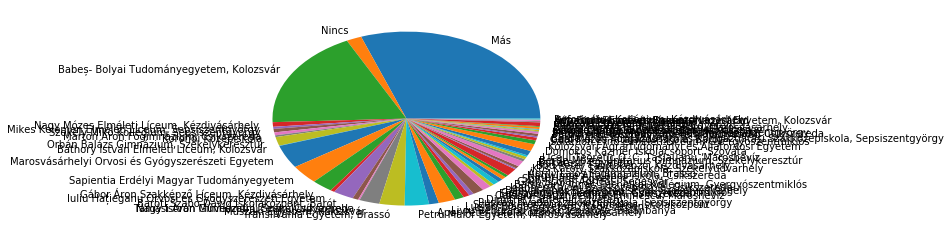

In [13]:
plt.pie(iskolak.values(),labels=[(i) for i in iskolak.keys()])
plt.show()

In [14]:
db = 0
for d in pure_data:
    if "workwhat" in d:
        m = workdict(d["workwhat"])
        #print(m, d["workwhat"])
        d["workwhat"] = m
    if "studwhere" in d:
        s = studdict(d["studwhere"])
        if s == 'Más':
            print(s, "****", d["studwhere"])
        d["studwhere"] = s
        
print(pure_data[:5])

Más **** uni wuppertal
Más **** tessedik sámuel főiskola
Más **** palló imre művészeti szakközépiskola
Más **** st. helena junior high school
Más **** colegiul universitar medical bv
Más **** post liceal sanitar eugen nicoara reghin 2004
Más **** aaaa
Más **** usab timisoara
Más **** colegiul national octavian goga
Más **** constantin brâncuși
Más **** lps tg mures
Más **** rátkai tímea oktatási stúdió
Más **** grup scolar lucian blaga reghin
Más **** universität leipzig
Más **** universitatea lucian blaga din sibiu
Más **** váradi józsef i viii osztályos iskola
Más **** székelyudvarhely
Más **** humboldt university of berlin
Más **** ucecom timisoara, electromures tg.mures
Más **** szakkozepiskola
Más **** moholy nagy university of art and design
Más **** skin care and spa institute
Más **** scoala postliceala sanitara eugen nicoara
Más **** atestat circul de stat
Más **** ‎sibilism سیبیلیسم‎
Más **** alexandru ceusianu
Más **** "bethlen gábor" Általános iskola, gyergyószárhegy
Más **

Más **** eötvös józsef szakközépiskola
Más **** scoala postliceala henri coanda cluj napoca
Más **** szent istván egyetem
Más **** brassói tarnsilvania tudomány egyetem
Más **** rgm college, joginder nagar
Más **** deoec Áok
Más **** grup scolar forestier
Más **** universität heidelberg
Más **** nagyváradi állami egyetem
Más **** székely károly
Más **** hauard
Más ****  
Más **** szekely karoly
Más **** ase comert
Más **** szent istván egyetem
Más **** eötvös józsef mezőgazdasági szakközépiskola
Más **** university of medicine and pharmacy, tirgu mures
Más **** orvosi és gyógyszerészeti egyetem, klúzs napocahontas
Más **** universitatea de medicina si farmacie din tg mures
Más **** louis pasteur egeszsegugyi posztliceum
Más **** palló imre művészeti szakközépiskola
Más **** colegiul pedagogic
Más **** université paris 12   val de marne
Más **** palló imre művészeti szakközépiskola
Más **** iszti innovációs szakképző és továbbképző iskola és gimnázium
Más **** protestáns teológiai intéz

Más **** ,,,,,,,,,,,,,,,,
Más **** mÜtf (modern Üzleti tudományok főiskolája)
Más **** ies alejandria
Más **** liceul tehnologic traian vuia
Más **** még nem járok
Más **** nyme mÉk, mosonmagyaróvár
Más **** elte   eötvös loránd tudományegyetem pszichológia ma
Más **** rgm college, joginder nagar
Más **** pécsi tudományegyetem
Más **** facultatea de psihologie pedagogie brasov
Más **** udc amf targu mures
Más **** facultatea de arhitectura si urbanism
Más **** scoala postliceala sanitara toplita
Más **** université paris quest nanterre la défense bgf pszk budapest
Más **** management
Más **** universitatea "lucia blaga"
Más **** kántor tanítóképző főiskola, marosvásárhely
Más **** universitatea de arte si design
Más **** in germany for deutsch language at vhs volkshochshule
Más **** universitatea de arhitectură și urbanism ion mincu
Más **** elekes vencel Általános iskola
Más **** toplita harghita
Más **** fspac   cluj napoca
Más **** pázmány péter catholic university
Más **** laurenti

Más **** nagyváradi állami egyetem
Más **** prins claus conservatorium groningen
Más **** universitatea de arhitectura si urbanism "ion mincu"
Más **** u.s.a.m.v.  tajepiteszet,kolozsvar
Más **** university of toronto
Más **** kajony
Más **** facultatea de arhitectura si urbanism
Más **** universitatea bacau educatie fizica si sport
Más **** universitatea politehnica cluj napoca
Más **** colegiul national "alexandru papiu ilarian"
Más **** bod peter aszisztenskepzo foiskola
Más **** university of catania
Más **** sepsiszentgyorgyi egeszsegugyi postliceum
Más **** universität passau
Más **** university of debrecen
Más **** ase bucuresti, management
Más **** f.e.f.s. universitatea oradea
Más **** university of debrecen
Más **** elev
Más **** szakkozepiskola
Más **** Óbudai egyetem
Más **** facultatea de management brasov
Más **** the gallifreyan academy for timelords
Más **** szent istván egyetem
Más **** facultatea de Ştiinţe economice, universitatea din oradea
Más **** liceul teoretic 

Más **** paintball word!
Más **** university of winchester
Más **** ipssar alberghiero
Más **** eötvös józsef mezőgazdasági szakközépiskola
Más **** mihail sturdza
Más **** university of castilla–la mancha
Más **** colegiul national "mircea eliade" sighisoara
Más **** liceul tehnologic economic administrativ piatra neamţ
Más **** universitatea de arta si design   cluj napoca
Más **** eötvös józsef szakközépiskola székelyudvarhely
Más **** budapest i károli gáspár református egyetem
Más **** faipari liceum
Más **** ausbildungszentrum wiener rotes kreuz
Más **** university of reading
Más **** lucian blaga sibiu
Más **** universitatea bucuresti
Más **** dögi egészségügyi technikum
Más **** ceccar   corpul expertilor contabili si contabililor autorizati din romania
Más **** liceul tehnologic "lucian blaga" reghin
Más **** nyme mék
Más **** grup scolar electromures
Más **** colegiul national ana aslan
Más **** jósika miklós Általános iskola
Más **** petőfi sándor iskolaközpont   csíkdánfalv

Más **** protestáns teológiai intézet kolozsvár
Más **** bukarest
Más **** facultatea de psihologie
Más **** cluj, business
Más **** liceul tehnologic nr. 1 sighişoara
Más **** facultatea de stat acasa
Más **** egeszsegugyi posztliceum
Más **** gheorghe asachi technical university of iași
Más **** fogarasy mihály műszaki líceum
Más **** venczel józsef
Más **** efs bacau
Más **** institutul bancar roman cluj napoca 2003
Más **** bce Étk
Más **** facultatea de limbi romanice, clasice şi orientale, universitatea bucureşti
Más **** muveszeti
Más **** brooklands college
Más **** budapest university of technology and economics
Más **** protestant theological institute of cluj
Más **** elte ppk
Más **** colegiul national octavian goga
Más **** mÜtf (modern Üzleti tudományok főiskolája)
Más **** university of debrecen, hungary
Más **** universitatea oradea
Más **** facultatea de stiinte politice, administrative si ale comunicarii
Más **** facultatea de drept
Más **** gál ferenc hittudományi fő

Más **** universitatea de nord din baia mare
Más **** universitatea oradea
Más **** universita guglielmo marconi
Más **** "bethlen gábor" Általános iskola, gyergyószárhegy
Más **** liceul teoretic "joseph haltrich" sighisoara
Más **** universitatea de vest vasile goldis arad
Más **** Árpádházi szent erzsébet római katolikus gimnázium
Más **** pke
Más **** egeszsegugyi posztliceum
Más **** corvinus university of budapest
Más **** eszterházy károly főiskola   gtk
Más **** northeastern illinois university
Más **** scoala populara de arta bucuresti
Más **** eötvös józsef szakközépiskola
Más **** károli gáspár református egyetem
Más **** szent istván egyetem növénytudományi doktori iskola
Más **** dögi egészségügyi technikum
Más **** vasile netea highschool
Más **** petőfi sándor Általános iskola, székelykeresztúr
Más **** université de lausanne
Más **** dögi egészségügyi technikum
Más **** protestáns teológiai intézet kolozsvár
Más **** s.illyes lajos
Más **** miu sighisoara
Más **** fcic 

Más **** facultatea de geografie
Más **** university of camerino
Más **** scoala postliceala sanitara sf. gheorghe
Más **** universitatea aierronautica timisoara
Más **** usp pszichológia
Más **** facultatea de drept
Más **** g.s.i.u. sighisoara
Más **** hova még azt is???
Más **** uaic iasi
Más **** diabetológiai szakápoló
Más **** universidad de chile
Más **** colegiul national "mircea eliade" sighisoara
Más **** szent istván egyetem   szie
Más **** fspac   cluj napoca
Más **** protestáns teológiai intézet kolozsvár
Más **** grupul scolar "gheorghe marinescu"
Más **** páli szent vince egeszsegügyi főiskola
Más **** suli
Más **** benedek elek tanítóképző, székelyudvarhely
Más **** venczel józsef
Más **** facultatea de pregatire casnik
Más **** poliţia română
Más **** kétegyházi mezőgazdasági szakképző iskola és kollégium
Más **** universitatea lucian blaga
Más **** universitatea ecologica din bucuresti
Más **** universitatea de stiinte agricole si medicina veterinara cluj napoca
Más *

Más **** venczel józsef
Más **** asia pacific college
Más **** mojito school
Más **** erdészeti és faipari egyetem sopron
Más **** facultatea de arhitectura si urbanism cluj napoca
Más **** eötvös józsef mezőgazdasági szakközépiskola
Más **** benedek elek tanítóképző, székelyudvarhely
Más **** uad
Más **** eugen nicoara egészségügyi posztliceum,csikszereda
Más **** grupul scolar "electromures"
Más **** humboldt university of berlin
Más **** alexandru ceusianu
Más **** facultatea de arhitectura si urbanism cluj
Más **** eötvös józsef szakközépiskola
Más **** louis pasteur egeszsegugyi posztliceum
Más **** 2 ipari liceum
Más **** international institute of tourism and management, krems
Más **** syddansk universitet kolding
Más **** pke nagyvárad
Más **** universitatea de arta si design   cluj napoca
Más **** upm, managementul resurselor umane
Más **** edutus főiskola
Más **** egészségügyi főiskola
Más **** umf carol davila
Más **** egészségügyi főiskola
Más **** universitatea de stiinte 

Más **** mztsz
Más **** grup Școlar „miron cristea” subcetate
Más **** technische universität münchen   tum
Más **** ptki
Más **** international university bruchsal
Más **** liceul tehnologic "lucian blaga" reghin
Más **** universitatea de stiinte agricole si medicina veterinara
Más **** facultatea de educatie fizica si sport
Más **** iba international business academy
Más **** zrínyi miklós gimnázium, budapest x.
Más **** facultatea de stiinte economice / universitatea "lucian blaga" din sibiu
Más **** gdf
Más **** istituto comprensivo di monteprandone
Más **** universitatea "valahia", facultatea de stiinte umaniste
Más **** könyvelési technikum
Más **** university of szeged
Más **** liceu echonomic
Más **** facultatea de drept
Más **** bacau
Más **** Óbudai egyetem, neumann kar
Más **** edutus főiskola
Más **** upt facultatea de constructii
Más **** kajoni janos
Más **** szekely karoly
Más **** balneofizioterapia
Más **** the university of nottingham
Más **** mÜtf
Más **** széchenyi 

Más **** károli gáspár református egyetem
Más **** grup scolar nicolae balcescu
Más **** gimnaziul "alexandru ioan cuza" tg. mures
Más **** gyogyszereszeti
Más **** iba international business academy
Más **** universitatea maritima constanta
Más **** far eastern university
Más **** föiskola
Más **** sepsiszentgyorgy agro
Más **** kolozsvári református kollégium
Más **** dr.p.boros fortunát,zetelaka
Más **** temesvári nyugati egyetem
Más **** university of szeged
Más **** bukarest
Más **** scoala postliceala sanitara "eugen nicoara" reghin
Más **** facultatea de muzica brasov
Más **** univ.de agricultura si medicina veterinara
Más **** east berkshire college, windsor
Más **** liceul teoretic mircea eliade sighisoara
Más **** palló imre művészeti szakközépiskola
Más **** universidad del golfo de mexico
Más **** alberto hurtado university
Más **** ppke btk kommunikáció és média intézet
Más **** budapest university of technology and economics
Más **** art and design university of cluj napo

Más **** séf veszprém
Más **** liceul tehnologic "lucian blaga" reghin
Más **** moholy nagy university of art and design (budapest)
Más **** eötvös józsef iskolaalapítvány szakközépiskolája
Más **** crystal nails hungary
Más **** colegiul tehnic
Más **** ip/3 marosvasarhely
Más **** imperial college london
Más **** pannon egyetem mérnöki kar
Más **** eötvös józsef szakközépiskola
Más **** universitatea george baritiu
Más **** kelenföldi műszaki középiskola
Más **** facultatea de business
Más **** academia de arte vizuale andreescu
Más **** semi
Más **** colegiul "mihai eminescu" bacau
Más **** liceul tehnologic traian vuia
Más **** budapest oszk
Más **** facultatea de medicina vasile goldis
Más **** gábor dénes főiskola
Más **** hochschule für musik freiburg
Más **** management
Más **** academia de studii economice, ase
Más **** academia de studii economice bucuresti
Más **** grupul scolar ”ion vlasiu” tirgu mures
Más **** facultatea de ingineria lemnului braşov
Más **** református kol

Más **** grup scolar agricol dumbravioara
Más **** hhfd
Más **** szie gtk
Más **** az sincs :d
Más **** universität zu köln
Más **** national and kapodistrian university of athens
Más **** .
Más **** stiinte politice, administrative si ale comunicarii
Más **** colegiul national "mircea eliade" sighisoara
Más **** universitatea de stiinte agricole si medicina veterinara cluj napoca
Más **** pannon lovas akadémia kaposvár
Más **** phoenix (classics journal)
Más **** Általános asszisztens ( orvos mellé)
Más **** trinity house community resource centre
Más **** universitatea technica
Más **** váradi józsef i viii osztályos iskola
Más **** sz
Más **** székely károly
Más ****  
Más **** universitatea de stiinte agricole si medicina veterinara din cluj napoca
Más **** venczel józsef
Más **** scoala nationala de gaz medias
Más **** a&m   Ács, asztalos munkák
Más **** szekely karoly
Más **** scoala postliceala sanitara
Más **** liceul teoretic lucian blaga ( fostul lmf 1 ), cluj napoca
Más ****

Más **** iba international business academy
Más **** magyar nyelv és irodalom szak, kolozsvár
Más **** sc postliceala sanitara
Más **** louis pasteur egészségügyi központ
Más **** eötvös józsef szakközépiskola
Más **** national academy of physical education and sport
Más **** kodolányi jános főiskola
Más **** venczel józsef iskolaközpont   csíkszereda
Más **** university of georgia
Más **** budapest university of technology and economics
Más **** École jésus marie
Más **** szentgyÖrgyi istvÁn szÍnmŰvÉszeti fŐiskola   marosvÁsÁrhely
Más **** székely károly
Más **** dögi egészségügyi technikum
Más **** liceul auto timisoara
Más **** colegiul tehnic raluca ripan
Más **** rajeev ghandhi university
Más **** vasile goldiş west university of arad
Más **** c.Ş.e. liceul teoretic "nicolae bălcescu"
Más **** liceul economic petrosani
Más **** "bethlen gábor" Általános iskola, gyergyószárhegy
Más **** university of siegen
Más **** komputer
Más **** fogarasy mihály műszaki líceum
Más **** scoala p

Más **** universitatea alma mater sibiu
Más **** scoala de politie "vasile lascar" campina
Más **** raritan valley community college
Más **** g.s.i.u. sighisoara
Más **** liceul teoretic "joseph haltrich" sighisoara
Más **** harvard university
Más **** elte tofk
Más **** universitatea din craiova
Más **** facultatea de medicina veterinara cluj
Más **** universitatea de stiinte agricole si medicina veterinara cluj napoca
Más **** protestáns teológiai intézet kolozsvár
Más **** no
Más **** scoala sanitara postliceala carol davila
Más **** universitatea de arta si design   cluj napoca
Más **** károli gáspár university of the reformed church in hungary
Más **** budapesti kommunikációs főiskola heller farkas turisztika szak
Más **** institutul agronomic cluj napoca,facultatea de medicina veterinara
Más **** facultatea de arhitectura si urbanism cluj napoca
Más **** semmelweis egyetem fogorvostudomáyi kar
Más **** universitatea lucian blaga
Más **** universitatea de stiinte agricole si medic

Más **** universitatea din oradea
Más **** toni & guy hairdressing academy
Más **** university of oradea
Más **** louis pasteur university
Más **** usab timisoara
Más **** Ștefan cel mare university of suceava
Más **** ut kolozsvar
Más **** károli gáspár református egyetem
Más **** liceul teoretic "mircea eliade", intorsura buzaului
Más **** debreceni egyetem
Más **** közgÁz!   budapesti corvinus egyetem
Más **** középiskola
Más **** ma irish studies
Más **** renmin university of china
Más **** Óbudai egyetem keleti károly gazdasági kar
Más **** secretariat
Más **** "louis pasteur" posztliceum csikszereda
Más **** eurocor  inspector resurse umane
Más **** facultatea de muzica
Más **** colegiul tehnic de comunicatii augustin maior cluj napoca
Más **** fspac
Más **** protestáns teológiai intézet kolozsvár
Más **** szakközép
Más **** centrul de reeducare
Más **** raoul wallenberg humán szakképző iskola és gimnázium
Más **** eugen nicoare
Más **** bgf   budapesti gazdasági főiskola
Más ***

Más **** pti kolozsvár
Más **** stefan gheorghiu
Más **** en ninguna jajaja pase por fuera de ella
Más **** gimnaziul liviu rebreanu
Más **** universitetet i oslo (uio)
Más **** academia de studii economice bucuresti
Más **** szovata
Más **** universitatea de stiinte agricole si medicina veterinara cluj napoca
Más **** szent margit gimnázium
Más **** grup Școlar „miron cristea” subcetate
Más **** debreceni egyetem agrár  és műszaki tudományok centruma
Más **** inginer
Más **** colegiul naţional unirea
Más **** facultatea de arhitectura si urbanism cluj napoca
Más **** marosi gergely
Más **** colegiul national "mircea eliade" sighisoara
Más **** colegiul agricol traian savulescu tg mures
Más **** colegiul national mircea eliade
Más **** brassai sámuel elméleti líceum
Más **** bgf kkk
Más **** Általános vállalkozási főiskola
Más **** universitatea bogdan voda cluj napoca
Más **** liceul teoretic "joseph haltrich" sighisoara
Más **** bme   budapesti műszaki és gazdaságtudományi egyetem
Má

Más **** batthanyi ignac
Más **** ise iasi
Más **** kémiai líceum marosvásárhely
Más **** universitatea ecologica bucuresti   facultatea de stiinte economice
Más **** fcic facultatea de chimie si inginerie chimica
Más **** university of west hungary
Más **** ecole supérieure des beaux arts de montpellier agglomération
Más **** facultatea de silvicultura si exploatari forestiere
Más **** utp petrosani
Más **** bgf. kvifk. ker. szakmenedzser
Más **** nyirő józsef Általános iskola
Más **** ibssa
Más **** parajd
Más **** liceul teoretic "joseph haltrich" sighisoara
Más **** universitatea de vest din timisoara
Más **** corvinus university of budapest
Más **** pali szent vince egeszsegugyi asszisztens kepzo
Más **** szemere bertalan Általános iskola és gimnázium
Más **** grup scolar electromures
Más **** universitatea de vest din timisoara
Más **** colegiul national octavian goga
Más **** kodolanyi janos university college
Más **** ush
Más **** colegiul agricol traian savulescu tg mures
Más 

Más **** scoala de corectie
Más **** ase management
Más **** facultatea de arhitectura si urbanism cluj napoca
Más **** universitatea din oradea
Más **** universitatea wales
Más **** gáspár andrás 607
Más **** eszterházy károly főiskola, eger
Más **** petrozseny
Más **** tibiscus university
Más **** dalum landbrugsskole
Más **** dögi egészségügyi technikum
Más **** universitatea "alexandru ioan cuza"
Más **** the photography institute
Más **** universität wien
Más **** colegiul national "mircea eliade" sighisoara
Más **** copenhagen business school
Más **** amersham & wycombe college (official)
Más **** protestáns teológiai intézet kolozsvár
Más **** scoala postliceala louis pasteur / miercurea ciuc
Más **** mÜtf székelyudvarhely
Más **** facultatea de arte si design cluj napoca
Más **** liceu teoretic liviu rebreanu
Más **** brassai sámuel elméleti líceum
Más **** dunaújvárosi főiskola , mutf, szekelyudvarhely , bmf  rkk budapest
Más **** ase bucuresti
Más **** scoala avram iancu dej


Más **** academia de politie "al. i. cuza"
Más **** budapest university of technology and economics
Más **** eötvös józsef mezőgazdasági szakközépiskola
Más **** gyulafehérvár, sis
Más **** universitate
Más **** liceul teoretic "joseph haltrich" sighisoara
Más **** liceul teoretic dumbraveni
Más **** mÜtf (modern Üzleti tudományok főiskolája)
Más **** the university of burdwan
Más **** harvard university
Más **** modern Üzleti tudományok főiskolája, székelyudvarhely
Más **** uat
Más **** facultatea de finante si banci
Más **** harriet ellis training and recruitment group
Más **** university of oxford
Más **** colegiul national octavian goga
Más **** epiteszeti liceum m vasarhely
Más **** benedek elek altalanos iskola
Más **** unatc i.l. caragiale
Más **** liceul teoretic paul georgescu tandarei
Más **** eötvös józsef mezőgazdasági szakközépiskola
Más **** gheorghe asachi politechnikai intezet
Más **** academia de studii economice bucuresti
Más **** grup scolar miron cristea subcetate
M

In [15]:
db = 0
for d in pure_data:
    if "studwhere" in d:
        if d["studwhere"] == 'Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem':
            db = db + 1
print(db)


950


Fodrász/Kozmetikus 3
Mérnök/Műépítész 10
Ügyvéd/Közjegyző 0
Tanár/Kutató 8
Tanuló 4
Informatikus 3
Sportoló/Edző/Bíró 5
Orvos/Gyógyszerész 5
Irodai_alkalmazott 4
Eladó/Ügynök/Recepciós 18
Bartender/Pincér/Szakács 12
Médiamunkás 2
Zenész/Művész 1
Igazgató/Vállalkozó 17
Nevelő/Au Pair/Önkéntes 10
Szakmunkás 9
Raktáros/Logisztikus 1
Sofőr 8
Közalkalmazott 4
Édesanya/Háztartásbeli 0
None 0
Más 61


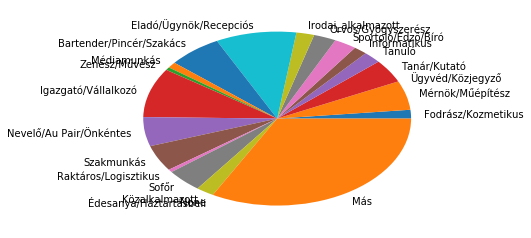

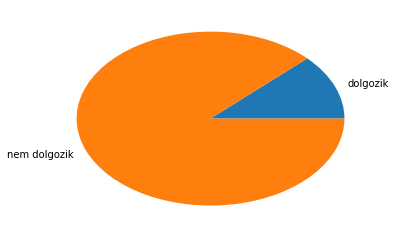

In [16]:
#Mit dolgoznak a különböző helységből származó emberek?

csiki_munka = dict.fromkeys(foglalkozasok, 0)
csiki_dolgozike = {"dolgozik":0, "nem dolgozik":0}

for d in pure_data:
    if d["birth"] == 'szovata':
        if "workwhat" in d:
            m = d["workwhat"]
            csiki_munka[m] = csiki_munka[m] + 1
            if m == "None":
                csiki_dolgozike["nem dolgozik"] = csiki_dolgozike["nem dolgozik"] + 1
            else:
                csiki_dolgozike["dolgozik"] = csiki_dolgozike["dolgozik"] + 1
        else:
            csiki_dolgozike["nem dolgozik"] = csiki_dolgozike["nem dolgozik"] + 1
            
for key, el in csiki_munka.items():
    print(key, el)
plt.pie(csiki_munka.values(),labels=[(i) for i in csiki_munka.keys()])
plt.show()

plt.pie(csiki_dolgozike.values(),labels=[(i) for i in csiki_dolgozike.keys()])
plt.show()


In [17]:

#I adapted the example you provided; you can tackle your problem by plotting two donuts on the same figure, with a smaller outer radius for one of them.

import matplotlib.pyplot as plt
import numpy as np

def make_pie(sizes, text,colors,labels, radius=1):
    col = [[i/255 for i in c] for c in colors]

    plt.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180)
    outside, _ = plt.pie(sizes, radius=radius, pctdistance=1-width/2,labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    plt.text(0, 0, text, ha='center', **kwargs)

## Group colors
#c1 = (226, 33, 7)
#c2 = (60, 121, 189)
#
## Subgroup colors
#d1 = (226, 33, 7)
#d2 = (60, 121, 189)
#d3 = (25, 25, 25)
#
#make_pie([100, 80, 90], "", [d1, d3, d2], ['M', 'N', 'F'], radius=1.2)
#make_pie([180, 90], "", [c1, c2], ['dolgozik', 'nem dolgozik'], radius=1)
#plt.show()

keresztur 87
csikszereda 91
udvarhely 80
barot 69
szentgyorgy 158
kezdi 135
kovaszna 203
szovata 61
vasarhely 181
gyergyo 132
vlahica 53
segesvar 159
kolozsvar 238
balan 105
regen 122
toplita 133
parajd 30
{'keresztur': 2830, 'csikszereda': 3508, 'udvarhely': 3310, 'barot': 2335, 'szentgyorgy': 3494, 'kezdi': 3384, 'kovaszna': 3915, 'szovata': 1522, 'vasarhely': 3823, 'gyergyo': 3461, 'vlahica': 2329, 'segesvar': 2539, 'kolozsvar': 3942, 'balan': 2312, 'regen': 2770, 'toplita': 2564, 'parajd': 1182}


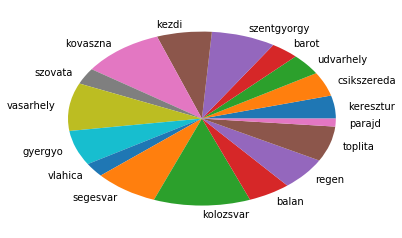

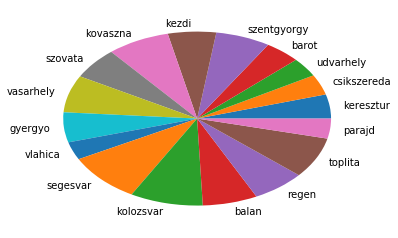

In [18]:
#Honnan származnak a különböző munkakörökben dolgozó emberek?

foglalkozasok_eloszlasa = dict.fromkeys(birth_cities, 0)

for d in pure_data:
    if "workwhat" in d:
        b = d["birth"]
        if d["workwhat"] == "Más":
            foglalkozasok_eloszlasa[b] = foglalkozasok_eloszlasa[b] + 1

for key, el in foglalkozasok_eloszlasa.items():
    print(key, el)

print(birth_cities_count)

plt.pie(foglalkozasok_eloszlasa.values(),labels=[(i) for i in foglalkozasok_eloszlasa.keys()])
plt.show()

for f in birth_cities:
    foglalkozasok_eloszlasa[f] = foglalkozasok_eloszlasa[f] / birth_cities_count[f] *100



plt.pie(foglalkozasok_eloszlasa.values(),labels=[(i) for i in foglalkozasok_eloszlasa.keys()])
plt.show()

{'Más': 67, 'Nincs': 2, 'Babeș- Bolyai Tudományegyetem, Kolozsvár': 51, 'Nagy Mózes Elméleti Líceum, Kézdivásárhely': 2, 'Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy': 1, 'Székely Mikó Kollégium, Sepsiszentgyörgy': 2, 'Márton Áron Főgimnázium, Csíkszereda': 1, 'Korondi Középiskola': 0, 'Orbán Balázs Gimnázium, Székelykeresztúr': 0, 'Báthory István Elméleti Líceum, Kolozsvár': 0, 'Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem': 3, 'Sapientia Erdélyi Magyar Tudományegyetem': 4, 'Gábor Áron Szakképző Líceum, Kézdivásárhely': 1, 'Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem': 0, 'Baróti Szabó Dávid Iskolaközpont, Barót': 0, 'Tamási Áron Gimnázium, Székelyudvarhely': 0, 'Nagy István Művészeti Líceum, Csíkszereda': 3, 'Műszaki Egyetem, Kolozsvár': 7, 'Transilvania Egyetem, Brassó': 7, 'Petru Maior Egyetem, Marosvásárhely': 6, 'Apor Péter Iskolaközpont, Kézdivásárhely': 0, 'Liviu Rebreanu Szakközépiskola, Balánbánya': 1, 'Lucian Blaga Egyetem, Nagyszeben': 0, 'Székelykeresztúri Z

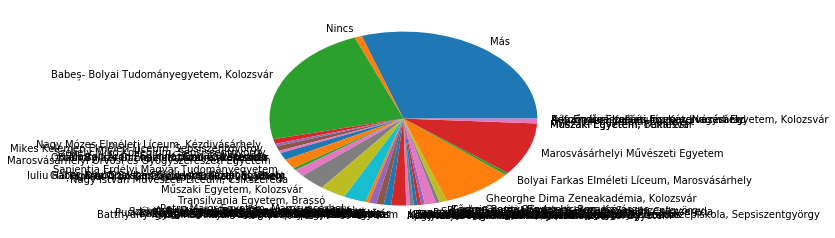

In [19]:
#Az egyes munkakörökben dolgozó személyek hol végeztek?

hol_vegzett = dict.fromkeys(intezmeny, 0)

for d in pure_data:
    if "studwhere" in d and "workwhat" in d:
        if d["workwhat"] == "Zenész/Művész":
            st = d["studwhere"]
            hol_vegzett[st] = hol_vegzett[st] + 1
print(hol_vegzett)

plt.pie(hol_vegzett.values(),labels=[(i) for i in hol_vegzett.keys()])
plt.show()

{'Fodrász/Kozmetikus': 0, 'Mérnök/Műépítész': 47, 'Ügyvéd/Közjegyző': 0, 'Tanár/Kutató': 3, 'Tanuló': 3, 'Informatikus': 37, 'Sportoló/Edző/Bíró': 2, 'Orvos/Gyógyszerész': 0, 'Irodai_alkalmazott': 2, 'Eladó/Ügynök/Recepciós': 4, 'Bartender/Pincér/Szakács': 0, 'Médiamunkás': 2, 'Zenész/Művész': 7, 'Igazgató/Vállalkozó': 31, 'Nevelő/Au Pair/Önkéntes': 0, 'Szakmunkás': 3, 'Raktáros/Logisztikus': 0, 'Sofőr': 1, 'Közalkalmazott': 2, 'Édesanya/Háztartásbeli': 0, 'None': 0, 'Más': 20}
Fodrász/Kozmetikus 0
Mérnök/Műépítész 47
Ügyvéd/Közjegyző 0
Tanár/Kutató 3
Tanuló 3
Informatikus 37
Sportoló/Edző/Bíró 2
Orvos/Gyógyszerész 0
Irodai_alkalmazott 2
Eladó/Ügynök/Recepciós 4
Bartender/Pincér/Szakács 0
Médiamunkás 2
Zenész/Művész 7
Igazgató/Vállalkozó 31
Nevelő/Au Pair/Önkéntes 0
Szakmunkás 3
Raktáros/Logisztikus 0
Sofőr 1
Közalkalmazott 2
Édesanya/Háztartásbeli 0
None 0
Más 20


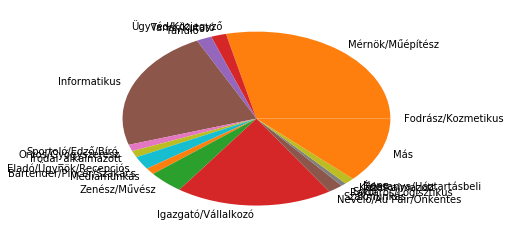

In [20]:
# Az egyes intézményekben végzett diákok milyen munkakörökben helyezkednek el?

mit_dolgozik = dict.fromkeys(foglalkozasok, 0)

for d in pure_data:
    if "workwhat" in d and "studwhere" in d:
        if d["studwhere"] == "Műszaki Egyetem, Kolozsvár":
            m = d["workwhat"]
            mit_dolgozik[m] = mit_dolgozik[m] + 1
print(mit_dolgozik)

for key, el in mit_dolgozik.items():
    print(key, el)
plt.pie(mit_dolgozik.values(),labels=[(i) for i in mit_dolgozik.keys()])
plt.show()

{'Más': 317, 'Nincs': 25, 'Babeș- Bolyai Tudományegyetem, Kolozsvár': 26, 'Nagy Mózes Elméleti Líceum, Kézdivásárhely': 0, 'Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy': 0, 'Székely Mikó Kollégium, Sepsiszentgyörgy': 0, 'Márton Áron Főgimnázium, Csíkszereda': 2, 'Korondi Középiskola': 0, 'Orbán Balázs Gimnázium, Székelykeresztúr': 0, 'Báthory István Elméleti Líceum, Kolozsvár': 0, 'Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem': 2, 'Sapientia Erdélyi Magyar Tudományegyetem': 2, 'Gábor Áron Szakképző Líceum, Kézdivásárhely': 0, 'Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem': 1, 'Baróti Szabó Dávid Iskolaközpont, Barót': 0, 'Tamási Áron Gimnázium, Székelyudvarhely': 0, 'Nagy István Művészeti Líceum, Csíkszereda': 0, 'Műszaki Egyetem, Kolozsvár': 3, 'Transilvania Egyetem, Brassó': 29, 'Petru Maior Egyetem, Marosvásárhely': 10, 'Apor Péter Iskolaközpont, Kézdivásárhely': 0, 'Liviu Rebreanu Szakközépiskola, Balánbánya': 443, 'Lucian Blaga Egyetem, Nagyszeben': 13, 'Székelykeres

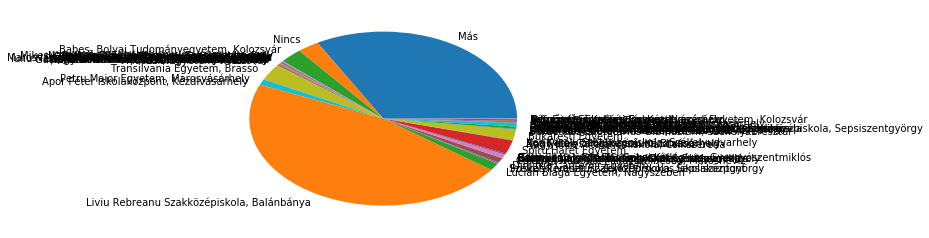

In [21]:
#Hol tanulnak a bizonyos városokból számrazó emberek?

hol_tanulnak_a = dict.fromkeys(intezmeny, 0)

for d in pure_data:
    if "studwhere" in d:
        if d["birth"] == "balan":
            st = d["studwhere"]
            hol_tanulnak_a[st] = hol_tanulnak_a[st] + 1
print(hol_tanulnak_a)

plt.pie(hol_tanulnak_a.values(),labels=[(i) for i in hol_tanulnak_a.keys()])
plt.show()

{'keresztur': 183, 'csikszereda': 309, 'udvarhely': 381, 'barot': 145, 'szentgyorgy': 399, 'kezdi': 259, 'kovaszna': 443, 'szovata': 51, 'vasarhely': 281, 'gyergyo': 333, 'vlahica': 95, 'segesvar': 143, 'kolozsvar': 731, 'balan': 26, 'regen': 142, 'toplita': 91, 'parajd': 51}


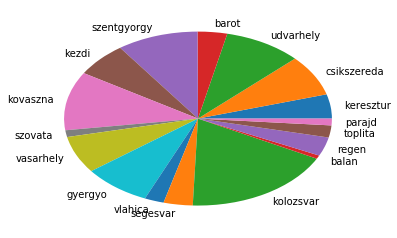

In [22]:
#Honnan származnak az egyes intézményekben végző emberek?

honnan_szarm = dict.fromkeys(birth_cities, 0)

for d in pure_data:
    if "studwhere" in d:
        if d["studwhere"] == 'Babeș- Bolyai Tudományegyetem, Kolozsvár':
            st = d["birth"]
            honnan_szarm[st] = honnan_szarm[st] + 1
print(honnan_szarm)
plt.pie(honnan_szarm.values(),labels=[(i) for i in honnan_szarm.keys()])
plt.show()

In [23]:
with open("nok.txt", 'r') as fn: # magyar es roman noi nevek osszegyujtve 
    noi_nevek = fn.read()

noi_nevek = szures(noi_nevek)

db = 0
for d in data:
    if "marriedto" in d:
        #print(d["name"], "-------", d["marriedto"])
        db = db + 1
print(db)
    

7986


In [24]:
#ha a vezetek vagy keresztnev noi, akkor nonek vesszuk - bar okozhat nehany hibat
#a szám szerint oké, kb fele nő - ebből leszámítva néány hibát
#a hazastarsak osszevissza vannak
db = 0;

#nn = []
i = 0
for d in data:
    
    nevek = d["name"].split();
    if nevek[0] in noi_nevek or nevek[1] in noi_nevek:
        db = db + 1;
        pure_data[i]["name"] = "2" # no
    else:
        pure_data[i]["name"] = "1" # ferfi
        #nn.append(d["name"])
        #if "marriedto" in d:
            #hazas = d["marriedto"].split();
            #if hazas[0] in noi_nevek or hazas[1] in noi_nevek: #ha a hazastarsa no az illetonek, ot nem vesszuk be
             #   db = db - 1;
                #print(hazas, "***", nevek)
              #  del nn[-1];
    i = i + 1;
        
print(db)


23451


In [25]:
#foglalkozastipusok megoszlasa ferfiak es nok kozott

nok = dict.fromkeys(foglalkozasok, 0)
ferfiak = dict.fromkeys(foglalkozasok, 0)
for d in pure_data:
    if "workwhat" in d:
        if d["name"] == "1":
            ferfiak[d["workwhat"]] = ferfiak[d["workwhat"]] + 1
        else:
            nok[d["workwhat"]] = nok[d["workwhat"]] + 1
        
print(foglalkozasok)
print(list(nok.values()))
print(ferfiak.values())

['Fodrász/Kozmetikus', 'Mérnök/Műépítész', 'Ügyvéd/Közjegyző', 'Tanár/Kutató', 'Tanuló', 'Informatikus', 'Sportoló/Edző/Bíró', 'Orvos/Gyógyszerész', 'Irodai_alkalmazott', 'Eladó/Ügynök/Recepciós', 'Bartender/Pincér/Szakács', 'Médiamunkás', 'Zenész/Művész', 'Igazgató/Vállalkozó', 'Nevelő/Au Pair/Önkéntes', 'Szakmunkás', 'Raktáros/Logisztikus', 'Sofőr', 'Közalkalmazott', 'Édesanya/Háztartásbeli', 'None', 'Más']
[85, 165, 23, 309, 60, 142, 142, 224, 237, 442, 169, 149, 198, 757, 208, 165, 14, 107, 44, 15, 19, 962]
dict_values([89, 148, 17, 350, 54, 147, 183, 249, 217, 487, 178, 157, 227, 676, 235, 189, 22, 138, 41, 24, 33, 1075])


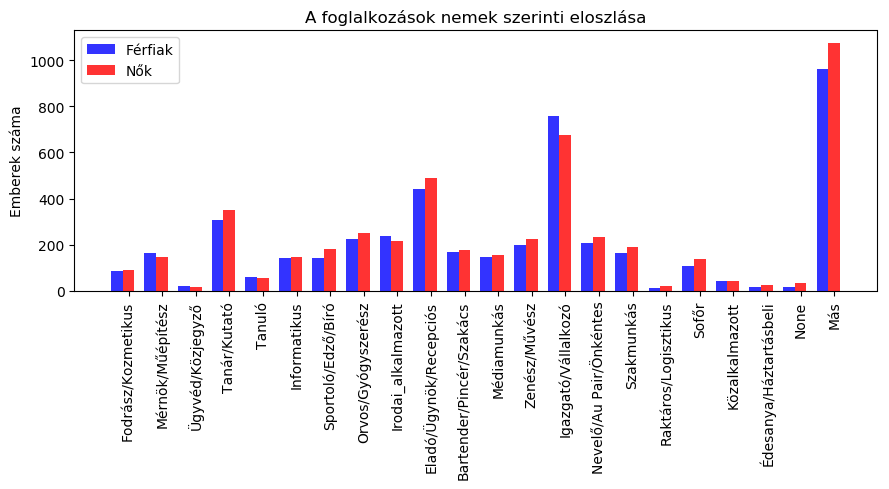

In [28]:
#nincsenek sajatos elteresek, ez is jelzi, h a nevek random modon voltak osszekeverve

import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = len(foglalkozasok)
means_frank = list(nok.values())
means_guido = list(ferfiak.values())
 
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
fig = plt.figure(figsize=(9, 5), dpi=100)    
    
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Férfiak')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Nők')

plt.ylabel('Emberek száma')
plt.title('A foglalkozások nemek szerinti eloszlása')
plt.xticks(index + bar_width, foglalkozasok, rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

In [29]:


def ekezetek(varos):
    if varos == "keresztur":
        return "Székelykeresztúr"
    elif varos == "csikszereda":
        return "Csíkszereda"
    elif varos == "udvarhely":
        return "Székelyudvarhely"
    elif varos == "vasarhely":
        return "Marosvásárhely"
    elif varos == "szovata":
        return "Szováta"
    elif varos == "parajd":
        return "Parajd"
    elif varos == "gyergyo":
        return "Gyergyószentmiklós"
    elif varos == "toplita":
        return "Maroshévíz"
    elif varos == "vlahica":
        return "Szentegyháza"
    elif varos == "kezdi":
        return "Kézdivásárhely"
    elif varos == "szentgyorgy":
        return "Sepsiszentgyörgy"
    elif varos == "kovaszna":
        return "Kovászna"
    elif varos == "balan":
        return "Balánbánya"
    elif varos == "kolozsvar":
        return "Kolozsvár"
    elif varos == "regen":
        return "Szászrégen"
    elif varos == "segesvar":
        return "Segesvár"
    elif varos == "barot":
        return "Barót"

for d in pure_data:
    d["birth"] = ekezetek(d["birth"])

pure_data[:5]

[{'birth': 'Székelykeresztúr',
  'id': 0,
  'livesin': 'szèkelykeresztur, harghita, romania',
  'name': '2',
  'studwhere': 'Orbán Balázs Gimnázium, Székelykeresztúr'},
 {'birth': 'Csíkszereda',
  'id': 1,
  'livesin': 'csikszentdomokos',
  'name': '1',
  'other1': 'venczel józsef iskolaközpont   csíkszereda'},
 {'birth': 'Székelyudvarhely',
  'id': 2,
  'livesin': 'angyalföld, budapest, hungary',
  'marriedto': 'péterfy eniko',
  'name': '2',
  'studwhere': 'Nincs',
  'workwhat': 'Igazgató/Vállalkozó',
  'workwhere': 'drogmentes világért alapítvány   magyarország'},
 {'birth': 'Barót', 'id': 3, 'livesin': 'budapest, hungary', 'name': '2'},
 {'birth': 'Sepsiszentgyörgy',
  'id': 4,
  'marriedto': 'lászló tünde',
  'name': '1'}]

In [30]:
#json file készítése d3js vizualizációhoz

flare = {}

for d in pure_data:
    varos = d["birth"]
    if varos not in flare:
        flare[varos] = {}
    
    
    if "workwhat" in d:
        munka = d["workwhat"]
    #else:
        #munka = "Ismeretlen"
        
        if munka not in flare[varos]:
            flare[varos][munka] = {}
        
        if "studwhere" in d:
            suli = d["studwhere"]
        #else:
            #suli = "Ismeretlen "
    
            if suli not in flare[varos][munka]:
                flare[varos][munka][suli] = 1;
            else:
                flare[varos][munka][suli] = flare[varos][munka][suli] + 1
            

print(flare)

{'Székelykeresztúr': {'Fodrász/Kozmetikus': {'Berde Mózes Unitárius Gimnázium, Székelykeresztúr': 1}, 'Igazgató/Vállalkozó': {'Székelykeresztúri Zeyk Domokos Iskolaközpont': 4, 'Bányai János Szakközépiskola, Székelyudvarhely': 1, 'Más': 10, 'Orbán Balázs Gimnázium, Székelykeresztúr': 4, 'Transilvania Egyetem, Brassó': 1, 'Babeș- Bolyai Tudományegyetem, Kolozsvár': 3, 'Sapientia Erdélyi Magyar Tudományegyetem': 2}, 'Eladó/Ügynök/Recepciós': {'Más': 11, 'Babeș- Bolyai Tudományegyetem, Kolozsvár': 7, 'Székelykeresztúri Zeyk Domokos Iskolaközpont': 2, 'Nincs': 5, 'Orbán Balázs Gimnázium, Székelykeresztúr': 2, 'Berde Mózes Unitárius Gimnázium, Székelykeresztúr': 1}, 'Nevelő/Au Pair/Önkéntes': {'Spiru Haret Egyetem': 1, 'Babeș- Bolyai Tudományegyetem, Kolozsvár': 2, 'Tamási Áron Gimnázium, Székelyudvarhely': 2, 'Más': 7, 'Orbán Balázs Gimnázium, Székelykeresztúr': 1}, 'Más': {'Nincs': 5, 'Babeș- Bolyai Tudományegyetem, Kolozsvár': 5, 'Spiru Haret Egyetem': 2, 'Más': 15, 'Orbán Balázs Gimnázi

In [32]:
#fileba írás a megfelelő módon
import codecs

with codecs.open("viz.json", "w", "utf-8-sig") as f:
    f.write("{ \n \"name\": \"Emberek\", \n \"children\": [ \n")
    
    i = 0
    for d in flare:
        f.write("  { \n")
        f.write("   \"name\": ")
        f.write("\"")
        f.write(d)
        f.write("\",\n")
        f.write("   \"children\": [ \n")
        
        j = 0
        for m in flare[d]:
            f.write("    {\"name\": ")
            f.write("\"")
            f.write(m)
            f.write("\",\n")
            f.write("     \"children\": [ \n")
            
            k = 0
            for s in flare[d][m]:
                f.write("      {\"name\": \"")
                f.write(s)
                f.write("\", \"size\": ")
                f.write(str(flare[d][m][s]))
                if k != len(flare[d][m]) - 1:
                    f.write( "},\n")
                else:
                    f.write("}\n")
                k = k + 1
            
            f.write("     ]\n")
            if j != len(flare[d]) - 1:
                f.write("    },\n")
            else:
                f.write("    }\n")
            j = j + 1
        
        
        f.write("   ]\n")
        
        if i != len(flare) - 1:
            f.write("  },\n")
        i = i + 1
    
    f.write("  }\n")    
    f.write(" ]\n}\n")